In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from matplotlib import rcParams
import math
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
df_neve_ofer=pd.read_csv("df_neve_oferEDA.cvs")
df_florentin=pd.read_csv("df_florentinEDA.cvs")
df_hagush_hagadol=pd.read_csv("df_hagush_hagadol1EDA.cvs")
df_kiryat_shalom=pd.read_csv("df_kiryat_shalomEDA.cvs")
df_neve_shaanan=pd.read_csv("df_neve_shaananEDA.cvs")
df_north_star=pd.read_csv("df_north_starEDA.cvs")


df_florentin.drop('Unnamed: 0',axis=1,inplace=True)
df_florentin = df_florentin.rename(columns={"price for meter":"price_for_meter","number of rooms":"number_of_rooms","year of build":"year_of_build","total price":"total_price"})

df_hagush_hagadol.drop('Unnamed: 0',axis=1,inplace=True)
df_hagush_hagadol = df_hagush_hagadol.rename(columns={"price for meter":"price_for_meter","number of rooms":"number_of_rooms","year of build":"year_of_build","total price":"total_price"})

df_neve_ofer.drop('Unnamed: 0',axis=1,inplace=True)
df_neve_ofer = df_neve_ofer.rename(columns={"price for meter":"price_for_meter","number of rooms":"number_of_rooms","year of build":"year_of_build","total price":"total_price"})

df_kiryat_shalom.drop('Unnamed: 0',axis=1,inplace=True)
df_kiryat_shalom = df_kiryat_shalom.rename(columns={"price for meter":"price_for_meter","number of rooms":"number_of_rooms","year of build":"year_of_build","total price":"total_price"})

df_neve_shaanan.drop('Unnamed: 0',axis=1,inplace=True)
df_neve_shaanan = df_neve_shaanan.rename(columns={"price for meter":"price_for_meter","number of rooms":"number_of_rooms","year of build":"year_of_build","total price":"total_price"})

df_north_star.drop('Unnamed: 0',axis=1,inplace=True)
df_north_star = df_north_star.rename(columns={"price for meter":"price_for_meter","number of rooms":"number_of_rooms","year of build":"year_of_build","total price":"total_price"})



In [6]:

df_hagush_hagadol

,adress,square,price_for_meter,number_of_rooms,floor,year_of_build,total_price,Day,Month,Year
0,1,147.0,40816.0,5.0,7.0,2019,5999952.0,5,10,2021
1,1,112.0,39732.0,4.0,2.0,2015,4449984.0,18,8,2021
2,1,88.0,46590.0,3.0,1.0,2016,4099920.0,10,8,2021
3,1,88.0,46590.0,3.0,1.0,1980,4099920.0,9,8,2021
4,1,98.0,40816.0,4.0,5.0,2009,3999968.0,9,8,2021
...,...,...,...,...,...,...,...,...,...,...
905,1,80.0,21000.0,3.0,0.0,2008,1680000.0,21,8,2008
906,1,80.0,20625.0,3.0,1.0,2008,1650000.0,21,8,2008
907,1,130.0,18076.0,5.0,1.0,2008,2349880.0,21,8,2008
908,1,80.0,17000.0,3.0,0.0,2008,1360000.0,20,8,2008


# גרפים על השכונה בפני עצמה(ללא קורלאציה)

array([[<AxesSubplot:title={'center':'total_price'}>,
        <AxesSubplot:title={'center':'number_of_rooms'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'year_of_build'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

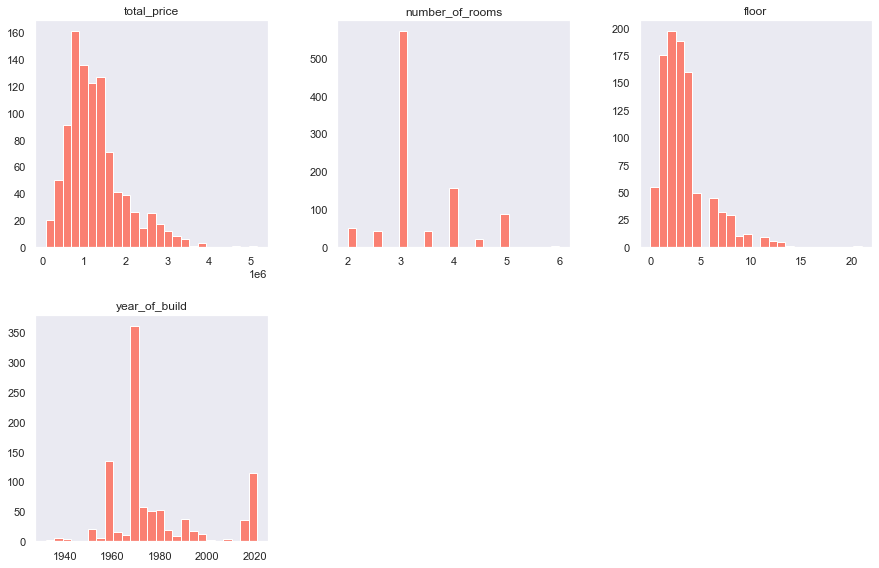

In [33]:
df_neve_ofer.hist(bins=25, layout=(3,3), figsize=(15,15), grid = False, color = 'salmon',column =['total_price','number_of_rooms','floor','year_of_build'])

In [ ]:
df_florentin.hist(bins=25, layout=(3,3), figsize=(15,15), grid = False, color = 'salmon',column =['total_price','number_of_rooms','floor','year_of_build'])

In [ ]:
df_north_star.hist(bins=25, layout=(3,3), figsize=(15,15), grid = False, color = 'salmon',column =['total_price','number_of_rooms','floor','year_of_build'])

In [ ]:
df_hagush_hagadol.hist(bins=25, layout=(3,3), figsize=(15,15), grid = False, color = 'salmon',column =['total_price','number_of_rooms','floor','year_of_build'])

In [ ]:
df_kiryat_shalom.hist(bins=25, layout=(3,3), figsize=(15,15), grid = False, color = 'salmon',column =['total_price','number_of_rooms','floor','year_of_build'])

In [ ]:
df_neve_shaanan.hist(bins=25, layout=(3,3), figsize=(15,15), grid = False, color = 'salmon',column =['total_price','number_of_rooms','floor','year_of_build'])

# קשרים בין המשתנים

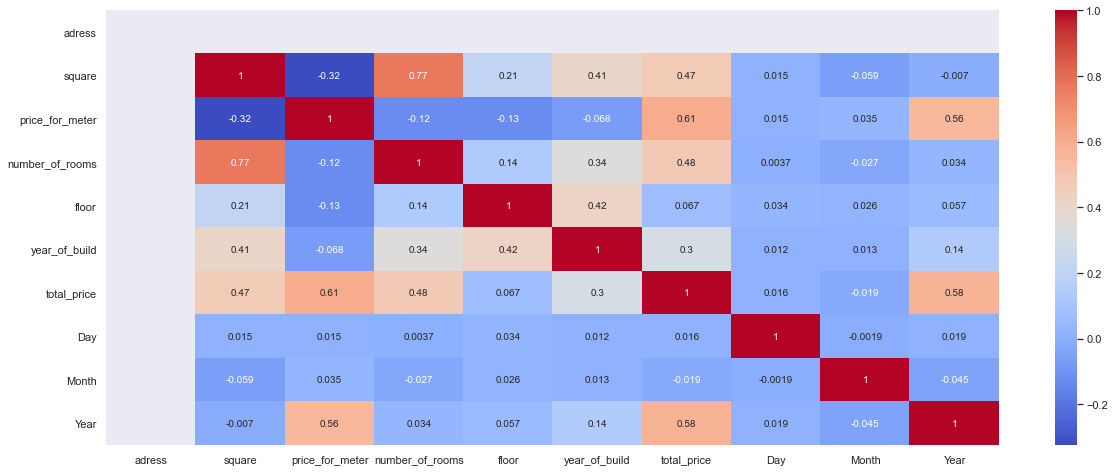

In [12]:
f, ax = plt.subplots(figsize=(20, 8))
corrMatrix = df_kiryat_shalom.corr()

sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()

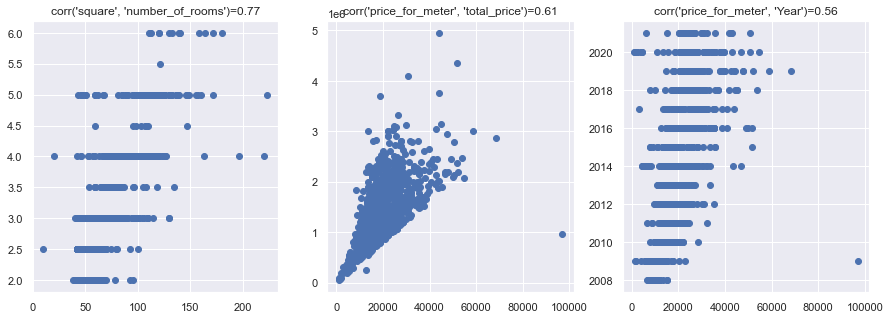

In [25]:


correlation_df = df_kiryat_shalom[df_kiryat_shalom.columns].corr()
row,col,tuple_arr,correlations = 1,0,[],[]

for row in range(len(correlation_df)):
    for col in range(row):
        if(correlation_df.iloc[row,col] > 0.5):
            correlations.append(correlation_df.iloc[row,col])
            tuple_arr.append((row,col))


fig, axes = plt.subplots(1, 3, figsize=(15,5))

for i in range(len(correlations)-1):
    axes[i].scatter(df_kiryat_shalom[df_kiryat_shalom.columns[tuple_arr[i][1]]], df_kiryat_shalom[df_kiryat_shalom.columns[tuple_arr[i][0]]])
    axes[i].title.set_text("corr('%s', '%s')=%4.2f" % (df_kiryat_shalom.columns[tuple_arr[i][1]], df_kiryat_shalom.columns[tuple_arr[i][0]], correlations[i]))











# גרפים בין 2 משתנים 

<AxesSubplot:xlabel='Year', ylabel='total_price'>

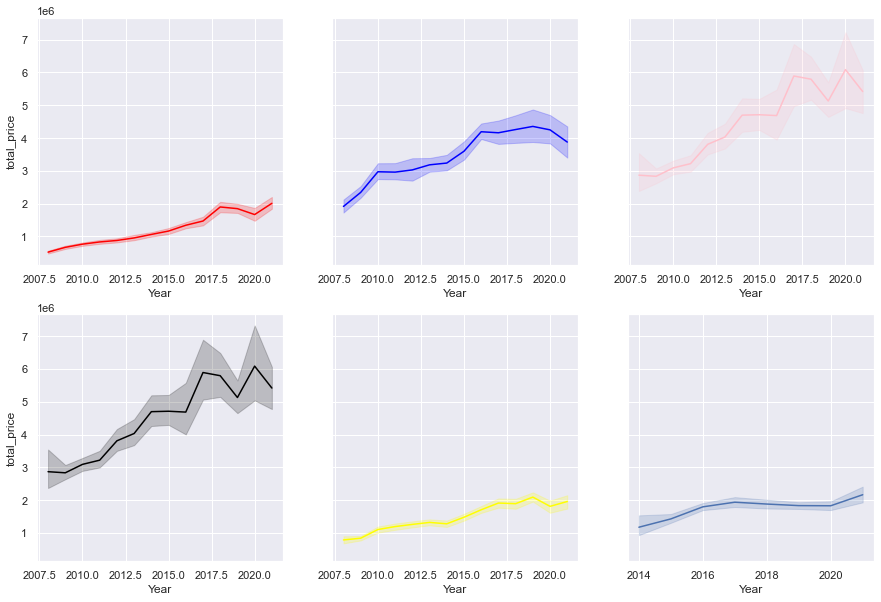

In [49]:
fig, axes = plt.subplots(2,3, figsize=(15, 10), sharey=True)


sns.lineplot(ax=axes[0][0],x='Year',y='total_price',data=df_neve_ofer,color='red')
sns.lineplot(ax=axes[0][1],x='Year',y='total_price',data=df_hagush_hagadol,color='blue')
sns.lineplot(ax=axes[0][2],x='Year',y='total_price',data=df_north_star,color='pink')
sns.lineplot(ax=axes[1][0],x='Year',y='total_price',data=df_north_star,color='black')
sns.lineplot(ax=axes[1][1],x='Year',y='total_price',data=df_kiryat_shalom,color='yellow')
sns.lineplot(ax=axes[1][2],x='Year',y='total_price',data=df_neve_shaanan)




In [52]:
df_ALL=pd.read_csv("df_ALL.csv")
df_ALL.drop('Unnamed: 0',axis=1,inplace=True)
df_ALL


,adress,square,price for meter,number of rooms,floor,year of build,total price,Day,Month,Year
0,1,147.0,40816.0,5.0,7.0,2019,5999952.0,5,10,2021
1,1,112.0,39732.0,4.0,2.0,2015,4449984.0,18,8,2021
2,1,88.0,46590.0,3.0,1.0,2016,4099920.0,10,8,2021
3,1,88.0,46590.0,3.0,1.0,1980,4099920.0,9,8,2021
4,1,98.0,40816.0,4.0,5.0,2009,3999968.0,9,8,2021
...,...,...,...,...,...,...,...,...,...,...
5707,6,50.0,22948.0,2.0,4.0,2016,1147400.0,16,12,2014
5708,6,50.0,22439.0,2.0,2.0,2016,1121950.0,16,12,2014
5709,6,76.0,14736.0,3.0,3.0,1958,1119936.0,16,12,2014
5710,6,60.0,7333.0,3.0,0.0,1960,439980.0,16,12,2014


<AxesSubplot:xlabel='adress', ylabel='total price'>

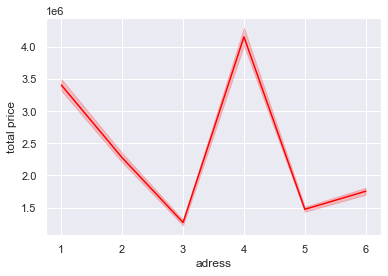

In [58]:
#df_florentin = df_florentin.rename(columns={"price for meter":"price_for_meter","number of rooms":"number_of_rooms","year of build":"year_of_build","total price":"total_price"})

sns.lineplot(x='adress',y='total price',data=df_ALL,color='red')


# האם למשפחה

C:\Users\benpe\Downloads\pythonG\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'number_of_rooms - florentin')

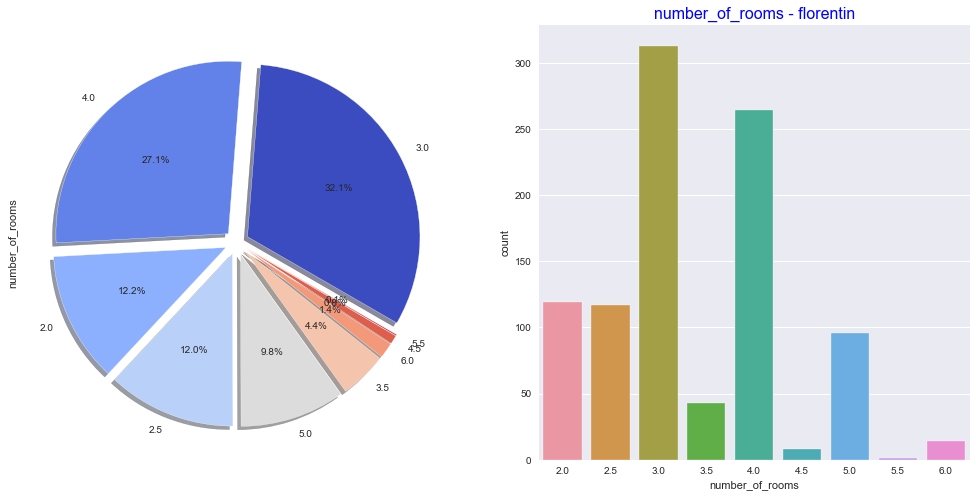

In [63]:
explode = (0.07, 0.07, 0.07, 0.07,0.07,0.07,0.07,0.07, 0.07)
plt.style.use('seaborn')
fig, axes = plt.subplots(1,2, figsize=(17,8))
sns.countplot(df_kiryat_shalom["number_of_rooms"])
df_kiryat_shalom['number_of_rooms'].value_counts().plot(ax=axes[0],kind='pie',cmap='coolwarm', shadow=True, explode=explode,
                                               autopct='%1.1f%%', startangle=-30)
plt.title('number_of_rooms - florentin',fontdict={'fontsize': 16, 'fontweight': 'medium', 'color': 'blue'})

C:\Users\benpe\Downloads\pythonG\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'number_of_rooms - florentin')

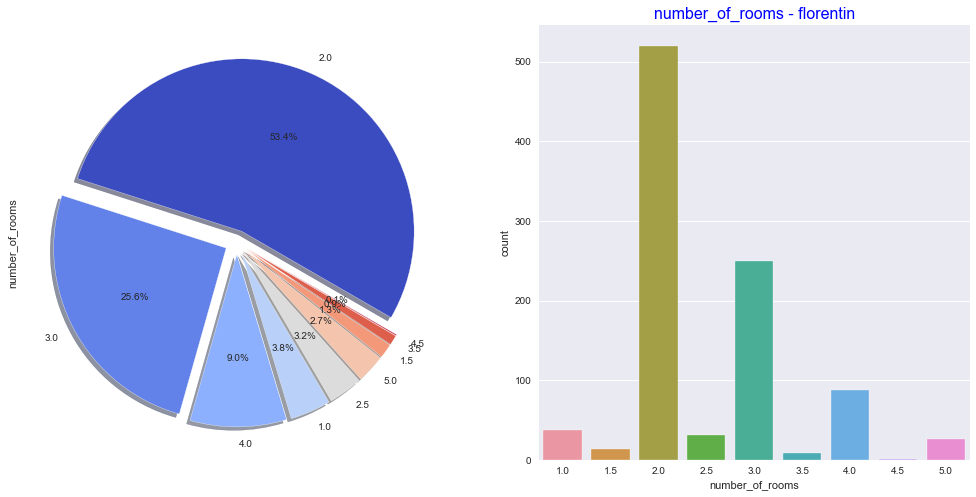

In [64]:
explode = (0.07, 0.07, 0.07, 0.07,0.07,0.07,0.07,0.07, 0.07)
plt.style.use('seaborn')
fig, axes = plt.subplots(1,2, figsize=(17,8))
sns.countplot(df_florentin["number_of_rooms"])
df_florentin['number_of_rooms'].value_counts().plot(ax=axes[0],kind='pie',cmap='coolwarm', shadow=True, explode=explode,
                                               autopct='%1.1f%%', startangle=-30)
plt.title('number_of_rooms - florentin',fontdict={'fontsize': 16, 'fontweight': 'medium', 'color': 'blue'})

In [66]:
df_info=pd.read_csv("DF_infoVis.csv")
df_info.drop('Unnamed: 0',axis=1,inplace=True)
df_info

,neighborhood num,Average_rent,School_grade,Socio_economic,Cleanliness_Maintenance,Kindergarten,Parking,Public_Transport,Feeling_confident,Gardens,Recreation_and_leisure,Shopping,Pedestrian_comfort
0,1,10500,4.50,4.5,4.4,4.4,3.7,3.5,4.7,4.2,2.9,3.1,3.7
1,2,6050,1.75,2.5,2.0,2.3,2.9,4.1,3.5,2.1,4.5,4.2,3.8
2,3,4450,2.25,1.5,3.9,4.3,4.6,4.5,4.0,4.6,2.2,3.1,4.7
3,4,10500,5.00,4.5,4.5,4.1,4.5,3.8,4.6,4.5,3.1,3.0,4.3
4,5,6200,3.85,1.5,4.1,4.2,4.3,4.2,4.7,4.8,2.9,3.3,4.7
5,6,5000,2.50,2.0,2.6,2.8,3.6,4.6,2.8,2.7,2.7,2.8,4.0


<AxesSubplot:ylabel='Average_rent'>

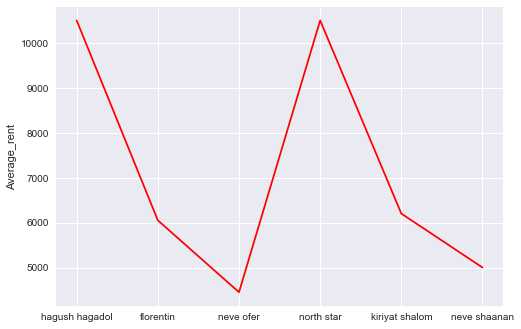

In [81]:
sns.lineplot(x=names,y='Average_rent',data=df_info,color='red')